In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
os.listdir()

['detailed_player_stats_field.csv',
 '.DS_Store',
 'ESPNcricinfo.ipynb',
 '.ipynb_checkpoints',
 'detailed_player_stats_bat.csv',
 'detailed_player_stats_bowl.csv',
 'analysis.ipynb']

In [4]:
detailed_player_stats_bat = pd.read_csv("detailed_player_stats_bat.csv")
detailed_player_stats_bowl = pd.read_csv("detailed_player_stats_bowl.csv")
detailed_player_stats_field = pd.read_csv("detailed_player_stats_field.csv")

In [11]:
detailed_player_stats_bat.head()

,Unnamed: 0,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15,Team,Start Date,End Date
0,0,AM Rahane,4,4.0,1.0,146.0,73.0,48.66,213.0,68.54,0.0,1.0,0.0,8.0,2.0,NaN,India,2015-01-01,2015-02-01
1,1,RG Sharma,1,1.0,0.0,138.0,138.0,138.00,139.0,99.28,1.0,0.0,0.0,9.0,4.0,NaN,India,2015-01-01,2015-02-01
2,2,MS Dhoni,4,3.0,0.0,70.0,34.0,23.33,124.0,56.45,0.0,0.0,0.0,6.0,0.0,NaN,India,2015-01-01,2015-02-01
3,3,AT Rayudu,3,3.0,0.0,58.0,23.0,19.33,94.0,61.70,0.0,0.0,0.0,5.0,1.0,NaN,India,2015-01-01,2015-02-01
4,4,SK Raina,4,3.0,0.0,53.0,51.0,17.66,71.0,74.64,0.0,1.0,0.0,6.0,0.0,NaN,India,2015-01-01,2015-02-01


In [15]:
detailed_player_stats_bowl.head()

,Unnamed: 0,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Unnamed: 14,Team,Start Date,End Date
0,0,STR Binny,3,2.0,15.0,0.0,67.0,4.0,3/33,16.75,4.46,22.5,0.0,0.0,NaN,India,2015-01-01,2015-02-01
1,1,Mohammed Shami,4,3.0,21.1,0.0,98.0,2.0,1/31,49.00,4.62,63.5,0.0,0.0,NaN,India,2015-01-01,2015-02-01
2,2,AR Patel,4,3.0,27.3,1.0,116.0,2.0,1/39,58.00,4.21,82.5,0.0,0.0,NaN,India,2015-01-01,2015-02-01
3,3,MM Sharma,1,1.0,10.0,1.0,36.0,2.0,2/36,18.00,3.60,30.0,0.0,0.0,NaN,India,2015-01-01,2015-02-01
4,4,UT Yadav,2,2.0,16.0,1.0,97.0,2.0,2/55,48.50,6.06,48.0,0.0,0.0,NaN,India,2015-01-01,2015-02-01


In [16]:
detailed_player_stats_field.head()

,Unnamed: 0,Player,Mat,Inns,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I,Unnamed: 11,Team,Start Date,End Date
0,0,STR Binny,3,2.0,2.0,2.0,0.0,0.0,2.0,NaN,1.000,NaN,India,2015-01-01,2015-02-01
1,1,MS Dhoni,4,3.0,2.0,2.0,0.0,2.0,0.0,NaN,0.666,NaN,India,2015-01-01,2015-02-01
2,2,AT Rayudu,3,2.0,2.0,2.0,0.0,0.0,2.0,NaN,1.000,NaN,India,2015-01-01,2015-02-01
3,3,R Ashwin,1,1.0,1.0,1.0,0.0,0.0,1.0,NaN,1.000,NaN,India,2015-01-01,2015-02-01
4,4,S Dhawan,4,3.0,1.0,1.0,0.0,0.0,1.0,NaN,0.333,NaN,India,2015-01-01,2015-02-01


In [13]:
def plot_player_performance(df, player_name, value_columns):
    """
    Plots time series line charts for a player's performance across multiple metrics.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing player statistics.
        player_name (str): The name of the player to filter.
        value_columns (list): A list of column names for the values to be monitored (e.g., ['Runs', 'Wkts']).
    """
    # Filter data for the specific player
    player_df = df[df['Player'] == player_name].copy()
    
    # Convert Start Date to datetime
    player_df['Start Date'] = pd.to_datetime(player_df['Start Date'])
    player_df['End Date'] = pd.to_datetime(player_df['End Date'])
    
    # Sort by start date
    player_df = player_df.sort_values(by='Start Date')
    
    # Plot
    plt.figure(figsize=(10, 5))
    for value_column in value_columns:
        plt.plot(player_df['Start Date'], player_df[value_column], marker='o', linestyle='-', label=value_column)
    
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title(f"{player_name}'s Performance Over Time")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

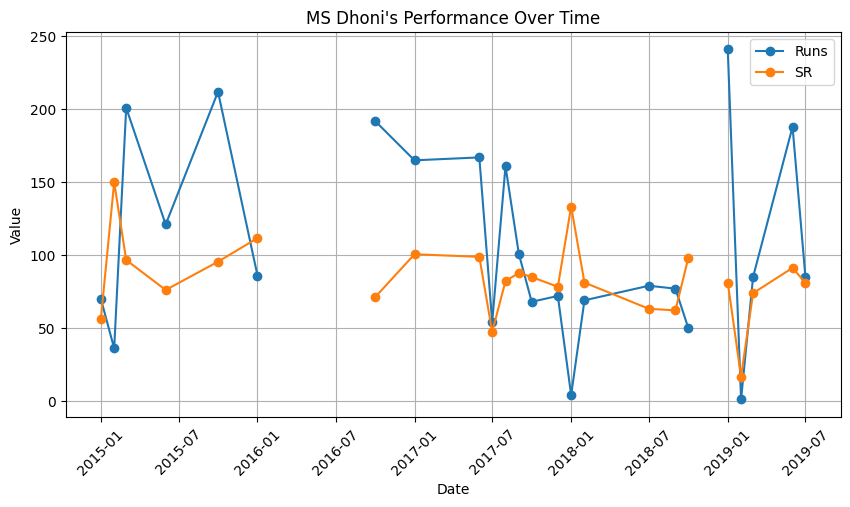

In [21]:
plot_player_performance(detailed_player_stats_bat, 'MS Dhoni', ['Runs', "SR"])

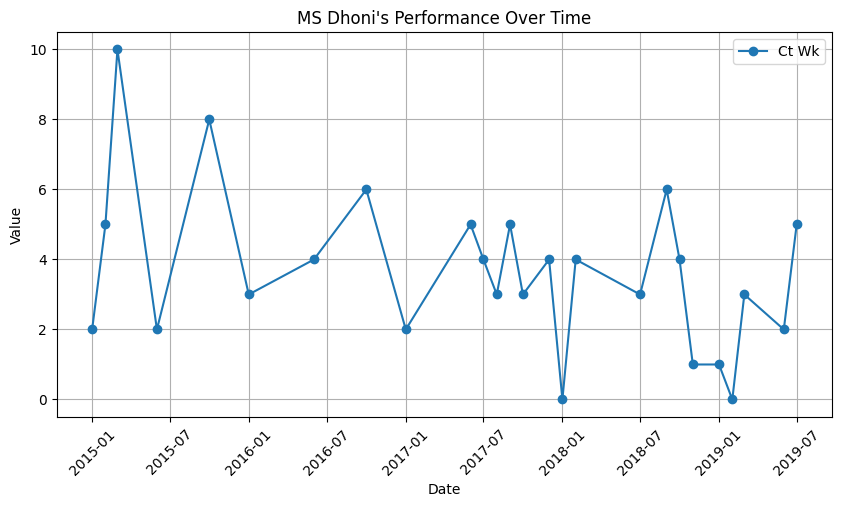

In [22]:
plot_player_performance(detailed_player_stats_field, 'MS Dhoni', ['Ct Wk'])